**EDA**  
Изучем структуру и особенности данных.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

In [5]:
train_df = pd.read_csv('../data/train.csv')

In [7]:
train_df.head(3)

,id,text,rating,positive
0,0,Bromwell High is a cartoon comedy. It ran at t...,9,1
1,10000,Homelessness (or Houselessness as George Carli...,8,1
2,10001,Brilliant over-acting by Lesley Ann Warren. Be...,10,1


In [8]:
train_df.tail(3)

,id,text,rating,positive
24997,999,I saw 'Descent' last night at the Stockholm Fi...,3,0
24998,99,Some films that you pick up for a pound turn o...,1,0
24999,9,"This is one of the dumbest films, I've ever se...",1,0


In [9]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        25000 non-null  int64 
 1   text      25000 non-null  object
 2   rating    25000 non-null  int64 
 3   positive  25000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 781.4+ KB


In [17]:
train_df.groupby('positive').count()[['id']]

,id
positive,
0,12500
1,12500


Одинаковое количество позитивных и негативных отзывов, как и написано в README.

In [53]:
rating_counts = train_df['rating'].value_counts().reset_index()
rating_counts

,rating,count
0,1,5100
1,10,4732
2,8,3009
3,4,2696
4,7,2496
5,3,2420
6,2,2284
7,9,2263


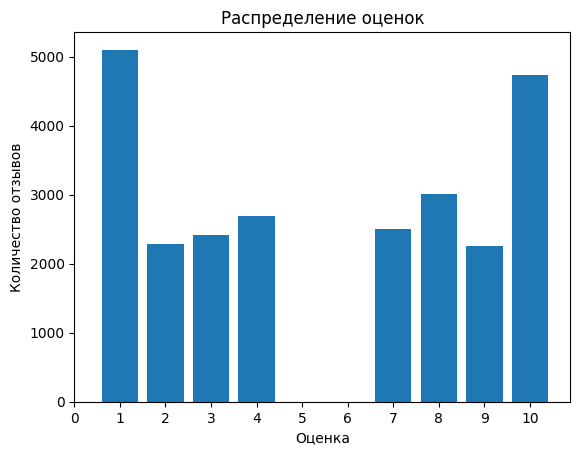

In [54]:
plt.bar(rating_counts['rating'], rating_counts['count']);
plt.xticks(range(11));
plt.xlabel('Оценка');
plt.ylabel('Количество отзывов');
plt.title('Распределение оценок');


Примерно одинаковое количество отзывов для оценок от 1 до 10, исключая 5 и 6.  
Оценки 1 и 10 встречаются примерно в 2 раза чаще других.

В наборе данных отсутствуют оценка 5, 6.  
В описании сказано, что набор данных предназначен для бинарного анализа тональностей, а оценки 5 и 6 близки к нейтральности.  
В связи с этим авторы датасета не включают эти оценка и в обучающай набор,  
а значит мы не сможем обучить модель прогнозировать эти оценки, используя эти данные, и методы классификации.

Рассмотрим некоторые тексты, чтобы понять структуру данных, выявить особенности



In [22]:
pprint(train_df['text'][0])

('Bromwell High is a cartoon comedy. It ran at the same time as some other '
 'programs about school life, such as "Teachers". My 35 years in the teaching '
 "profession lead me to believe that Bromwell High's satire is much closer to "
 'reality than is "Teachers". The scramble to survive financially, the '
 "insightful students who can see right through their pathetic teachers' pomp, "
 'the pettiness of the whole situation, all remind me of the schools I knew '
 'and their students. When I saw the episode in which a student repeatedly '
 'tried to burn down the school, I immediately recalled ......... at '
 ".......... High. A classic line: INSPECTOR: I'm here to sack one of your "
 'teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my '
 "age think that Bromwell High is far fetched. What a pity that it isn't!")


In [23]:
pprint(train_df['text'][1])

('Homelessness (or Houselessness as George Carlin stated) has been an issue '
 'for years but never a plan to help those on the street that were once '
 'considered human who did everything from going to school, work, or vote for '
 'the matter. Most people think of the homeless as just a lost cause while '
 'worrying about things such as racism, the war on Iraq, pressuring kids to '
 "succeed, technology, the elections, inflation, or worrying if they'll be "
 'next to end up on the streets.<br /><br />But what if you were given a bet '
 'to live on the streets for a month without the luxuries you once had from a '
 'home, the entertainment sets, a bathroom, pictures on the wall, a computer, '
 "and everything you once treasure to see what it's like to be homeless? That "
 "is Goddard Bolt's lesson.<br /><br />Mel Brooks (who directs) who stars as "
 'Bolt plays a rich man who has everything in the world until deciding to make '
 'a bet with a sissy rival (Jeffery Tambor) to see if he 

Здесь заметим, что в текстах есть специальные символы, например теги HTML.  
В дальнейшем может понадобиться чистка данных.

In [63]:
max_length = 0
text_lens = []

for text in train_df['text']:
  current_len = len(text)
  text_lens.append(current_len)

text_lens = np.array(text_lens)
print('Максимальная длина текстов: ', text_lens.max())
print('Минимальная длина текстов: ', text_lens.min())
print('Средняя длина текстов: ', round(text_lens.mean()))

Максимальная длина текстов:  13704
Минимальная длина текстов:  52
Средняя длина текстов:  1325


В наборе представленны тексты разной длины, от 52 символов до 13704.  
Возможно нам придется обрезать тексты к длине близкой к средней.
